In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

In [2]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    print("Sharpe", np.sqrt(252) * Ret.mean()/Ret.std())
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())

In [17]:
#Liste = ["VXRT US", "NVAX US", "MRNA US", "INO US", "REGN US", "GILD US", "SAN FP", "JNJ US"]
Liste = ["JNJ US", "SAN FP", "GSK LN", "GILD US", "REGN US", "MRNA US", "VIR US" , "INO US", "NVAX US", "VXRT US"]

# This list only includes thhe one that were approved by risk
Liste = ["JNJ US", "SAN FP", "GSK LN", "GILD US", "REGN US", "MRNA US", "INO US", "NVAX US"]


In [18]:
df = GetRet(Liste, "20200101")

Sharpe 1.6784719337163974


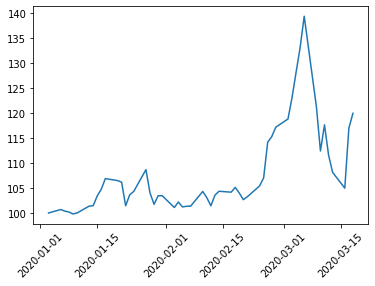

In [19]:
Plot(df)
plt.xticks(rotation=45)
plt.show()

In [3]:
Liste = ["VIR US", "VXRT US"]

Sharpe 1.3379355505291064


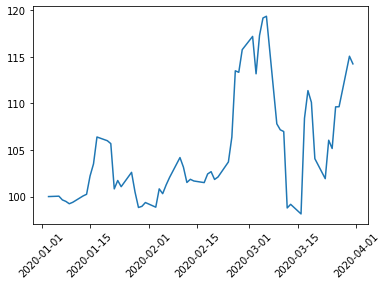

In [6]:
Plot(GetRet(["JNJ US", "SAN FP", "GSK LN", "GILD US", "REGN US", "MRNA US", "NVAX US"], "20200101"))
plt.xticks(rotation=45)
plt.show()